In [1]:
# import all the required packages
import pandas as pd
import numpy as np

# sklearn preprocess
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# feature engine
import feature_engine.imputation as mdi
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.outliers import Winsorizer
from feature_engine.imputation import MeanMedianImputer
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import BoxCoxTransformer
from feature_engine.transformation import ReciprocalTransformer

# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pandas.tseries.offsets import DateOffset

## Loading the Tables

In [2]:
#Loading the datasets 
List_of_orders = pd.read_csv('./Data/List of Orders.csv') 
Order_details = pd.read_csv('./Data/Order Details.csv') 
Sales_target= pd.read_csv('./Data/Sales Target.csv') 

In [3]:
List_of_orders

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata
...,...,...,...,...,...
555,NaN,NaN,NaN,NaN,NaN
556,NaN,NaN,NaN,NaN,NaN
557,NaN,NaN,NaN,NaN,NaN
558,NaN,NaN,NaN,NaN,NaN


In [4]:
Order_details

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones
...,...,...,...,...,...,...
1495,B-26099,835.0,267.0,5,Electronics,Phones
1496,B-26099,2366.0,552.0,5,Clothing,Trousers
1497,B-26100,828.0,230.0,2,Furniture,Chairs
1498,B-26100,34.0,10.0,2,Clothing,T-shirt


In [5]:
Sales_target

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0
5,Sep-18,Furniture,11000.0
6,Oct-18,Furniture,11100.0
7,Nov-18,Furniture,11300.0
8,Dec-18,Furniture,11400.0
9,Jan-19,Furniture,11500.0


In [6]:
orders = pd.merge(List_of_orders, Order_details, on=['Order ID'], how='inner', indicator=True)
orders

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,_merge
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases,both
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole,both
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief,both
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games,both
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones,both
...,...,...,...,...,...,...,...,...,...,...,...
1495,B-26099,30-03-2019,Bhishm,Maharashtra,Mumbai,835.0,267.0,5,Electronics,Phones,both
1496,B-26099,30-03-2019,Bhishm,Maharashtra,Mumbai,2366.0,552.0,5,Clothing,Trousers,both
1497,B-26100,31-03-2019,Hitika,Madhya Pradesh,Indore,828.0,230.0,2,Furniture,Chairs,both
1498,B-26100,31-03-2019,Hitika,Madhya Pradesh,Indore,34.0,10.0,2,Clothing,T-shirt,both


In [7]:
orders['Order Date'] = pd.to_datetime(orders['Order Date'], dayfirst=True)

# Create a new column 'Year-Month' with the desired format
orders['Month of Order Date'] = orders['Order Date'].dt.strftime('%b-%y')
orders

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,_merge,Month of Order Date
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases,both,Apr-18
1,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole,both,Apr-18
2,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief,both,Apr-18
3,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games,both,Apr-18
4,B-25602,2018-04-01,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones,both,Apr-18
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,B-26099,2019-03-30,Bhishm,Maharashtra,Mumbai,835.0,267.0,5,Electronics,Phones,both,Mar-19
1496,B-26099,2019-03-30,Bhishm,Maharashtra,Mumbai,2366.0,552.0,5,Clothing,Trousers,both,Mar-19
1497,B-26100,2019-03-31,Hitika,Madhya Pradesh,Indore,828.0,230.0,2,Furniture,Chairs,both,Mar-19
1498,B-26100,2019-03-31,Hitika,Madhya Pradesh,Indore,34.0,10.0,2,Clothing,T-shirt,both,Mar-19


## Merging the tables

In [8]:
# orders_t = pd.merge(orders, Sales_target, on=['Month of Order Date'], how='outer')
# orders_t

In [9]:
orders['Order Date'] = pd.to_datetime(orders['Order Date'])
#Numerical variables
Num_cols = orders.select_dtypes(include=['number']).columns.tolist()
orders[Num_cols]

,Amount,Profit,Quantity
0,1275.0,-1148.0,7
1,66.0,-12.0,5
2,8.0,-2.0,3
3,80.0,-56.0,4
4,168.0,-111.0,2
...,...,...,...
1495,835.0,267.0,5
1496,2366.0,552.0,5
1497,828.0,230.0,2
1498,34.0,10.0,2


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order ID             1500 non-null   object        
 1   Order Date           1500 non-null   datetime64[ns]
 2   CustomerName         1500 non-null   object        
 3   State                1500 non-null   object        
 4   City                 1500 non-null   object        
 5   Amount               1500 non-null   float64       
 6   Profit               1500 non-null   float64       
 7   Quantity             1500 non-null   int64         
 8   Category             1500 non-null   object        
 9   Sub-Category         1500 non-null   object        
 10  _merge               1500 non-null   category      
 11  Month of Order Date  1500 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 130.6+ KB

## Scatter plot of the Amount by Cities

<Figure size 2000x300 with 0 Axes>

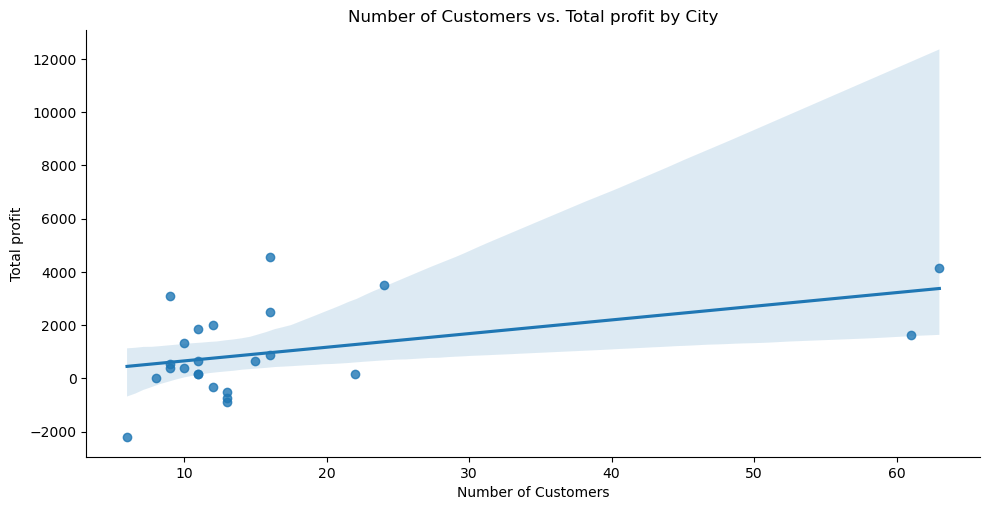

In [11]:
#plot a scatter plot of the amount by cities

Customers = orders.groupby('City')['CustomerName'].nunique().reset_index(name='UniqueCustomers')

# Sum Profit per City
profit_sum = orders.groupby('City')['Profit'].sum().reset_index(name='TotalProfit')

# Merge the two DataFrames
merged_df = pd.merge(Customers, profit_sum, on='City')

# Plotting
plt.figure(figsize=(20, 3))
sns.lmplot(data=merged_df, x='UniqueCustomers', y='TotalProfit',height=5, aspect=2)
plt.title('Number of Customers vs. Total profit by City')
plt.xlabel('Number of Customers')
plt.ylabel('Total profit')
plt.show()

In [12]:
# orders.info()

In [13]:
# orders.head()


## Conducting K-means Clustering

In [14]:
Orders_c = orders.copy()

In [15]:
drop_cols = ['Order ID','Order Date','CustomerName','_merge','Month of Order Date']
Orders_d = Orders_c.drop(columns=drop_cols)


In [16]:
Orders_d

,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones
...,...,...,...,...,...,...,...
1495,Maharashtra,Mumbai,835.0,267.0,5,Electronics,Phones
1496,Maharashtra,Mumbai,2366.0,552.0,5,Clothing,Trousers
1497,Madhya Pradesh,Indore,828.0,230.0,2,Furniture,Chairs
1498,Madhya Pradesh,Indore,34.0,10.0,2,Clothing,T-shirt


In [17]:
from sklearn.preprocessing import OneHotEncoder
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Select the columns to encode
columns_to_encode = Orders_d[['State','City','Sub-Category']]

# Fit and transform the encoder to the selected columns
encoded_columns = encoder.fit_transform(columns_to_encode)

# Convert the encoded columns to a DataFrame
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['State','City', 'Sub-Category']))

# Concatenate the original DataFrame with the encoded columns
Orders_c = pd.concat([Orders_d, encoded_df], axis=1)

# Drop the original columns
Orders_c = Orders_c.drop(columns=['State','City','Sub-Category'])



In [18]:
Orders_c

,Amount,Profit,Quantity,Category,State_Andhra Pradesh,State_Bihar,State_Delhi,State_Goa,State_Gujarat,State_Haryana,...,Sub-Category_Leggings,Sub-Category_Phones,Sub-Category_Printers,Sub-Category_Saree,Sub-Category_Shirt,Sub-Category_Skirt,Sub-Category_Stole,Sub-Category_T-shirt,Sub-Category_Tables,Sub-Category_Trousers
0,1275.0,-1148.0,7,Furniture,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,66.0,-12.0,5,Clothing,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,8.0,-2.0,3,Clothing,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,80.0,-56.0,4,Electronics,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,168.0,-111.0,2,Electronics,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,835.0,267.0,5,Electronics,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,2366.0,552.0,5,Clothing,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1497,828.0,230.0,2,Furniture,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1498,34.0,10.0,2,Clothing,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
unique_categories = Orders_c['Category'].unique()
print("Unique categories before mapping:", unique_categories)


Unique categories before mapping: ['Furniture' 'Clothing' 'Electronics']


In [20]:
category_mapping = {'Furniture': 1, 'Clothing': 2, 'Electronics': 3}
Orders_c['Category'] = Orders_c['Category'].map(category_mapping)
Orders_c

,Amount,Profit,Quantity,Category,State_Andhra Pradesh,State_Bihar,State_Delhi,State_Goa,State_Gujarat,State_Haryana,...,Sub-Category_Leggings,Sub-Category_Phones,Sub-Category_Printers,Sub-Category_Saree,Sub-Category_Shirt,Sub-Category_Skirt,Sub-Category_Stole,Sub-Category_T-shirt,Sub-Category_Tables,Sub-Category_Trousers
0,1275.0,-1148.0,7,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,66.0,-12.0,5,2,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,8.0,-2.0,3,2,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,80.0,-56.0,4,3,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,168.0,-111.0,2,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,835.0,267.0,5,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,2366.0,552.0,5,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1497,828.0,230.0,2,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1498,34.0,10.0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


C:\Users\xhhhh\anaconda35\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


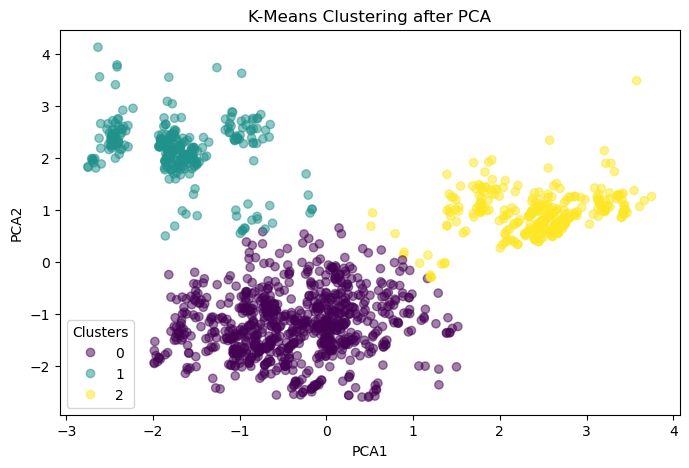

In [21]:
# Load data
data = Orders_c
# labels = Orders_c['Category']

np.random.seed(50)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3,random_state=42)
clusters = kmeans.fit_predict(data_pca)

# Create a DataFrame with PCA results and clusters
df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
df['Cluster'] = clusters

data = df.join(data)

# Plot the PCA results with clusters
plt.figure(figsize=(8,5))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering after PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Add legend
handles, labels = scatter.legend_elements(prop="colors")
legend_labels = [f'{i}' for i in range(3)]
plt.legend(handles, legend_labels, title="Clusters")

## Eblow Method to find the best K

C:\Users\xhhhh\anaconda35\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\xhhhh\anaconda35\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\xhhhh\anaconda35\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\xhhhh\anaconda35\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

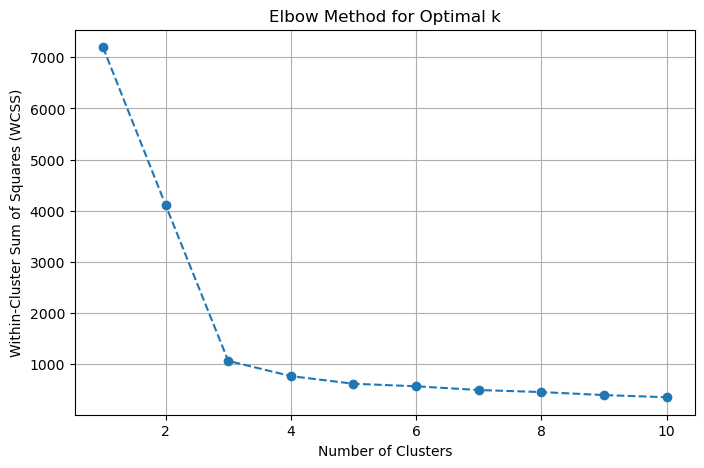

In [22]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()

In [23]:
data

,PCA1,PCA2,Cluster,Amount,Profit,Quantity,Category,State_Andhra Pradesh,State_Bihar,State_Delhi,...,Sub-Category_Leggings,Sub-Category_Phones,Sub-Category_Printers,Sub-Category_Saree,Sub-Category_Shirt,Sub-Category_Skirt,Sub-Category_Stole,Sub-Category_T-shirt,Sub-Category_Tables,Sub-Category_Trousers
0,0.960436,-0.995299,0,1275.0,-1148.0,7,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.034728,-1.484109,0,66.0,-12.0,5,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.210783,-1.587746,0,8.0,-2.0,3,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.639877,-1.229415,0,80.0,-56.0,4,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.390646,2.073007,1,168.0,-111.0,2,3,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-2.465236,2.717408,1,835.0,267.0,5,3,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,-1.818253,3.554154,1,2366.0,552.0,5,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1497,3.364654,1.289684,2,828.0,230.0,2,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1498,2.399966,0.439501,2,34.0,10.0,2,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
Sales_c= data.groupby('Cluster')['Amount'].mean().round()
x=['0','1','2']


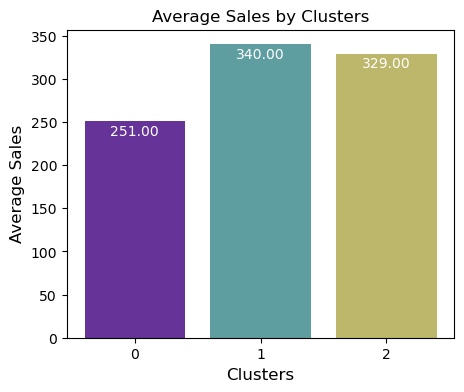

In [25]:
fig, ax = plt.subplots(figsize=(5, 4))

# Set title of the plot and the axes labels
ax.set_ylabel('Average Sales', fontsize=12)
ax.set_xlabel('Clusters', fontsize=12)

colors = ['rebeccapurple', 'cadetblue','darkkhaki']
# Plot the bar graph with custom colors
ax.bar(x, Sales_c,color = colors)

# Display data labels on the bars
for x, y in zip(x, Sales_c):
    label = "{:.2f}".format(y)
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, -10), ha='center',color='white')


# Tick size
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.title('Average Sales by Clusters')
# Display the plot
plt.show()

In [26]:
Profit_c= data.groupby('Cluster')['Profit'].mean().round()
x=['0','1','2']

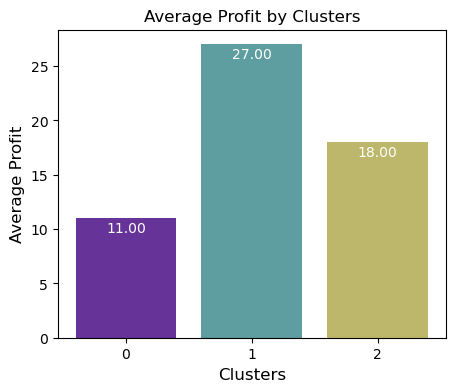

In [27]:
fig, ax = plt.subplots(figsize=(5, 4))

# Set title of the plot and the axes labels
ax.set_ylabel('Average Profit', fontsize=12)
ax.set_xlabel('Clusters', fontsize=12)

colors = ['rebeccapurple', 'cadetblue','darkkhaki']
# Plot the bar graph with custom colors
ax.bar(x, Profit_c,color = colors)

# Display data labels on the bars
for x, y in zip(x, Profit_c):
    label = "{:.2f}".format(y)
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, -10), ha='center',color='white')


# Tick size
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Display the plot
plt.title('Average Profit by Clusters')
plt.show()

## Cluster Analysis

C:\Users\xhhhh\anaconda35\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


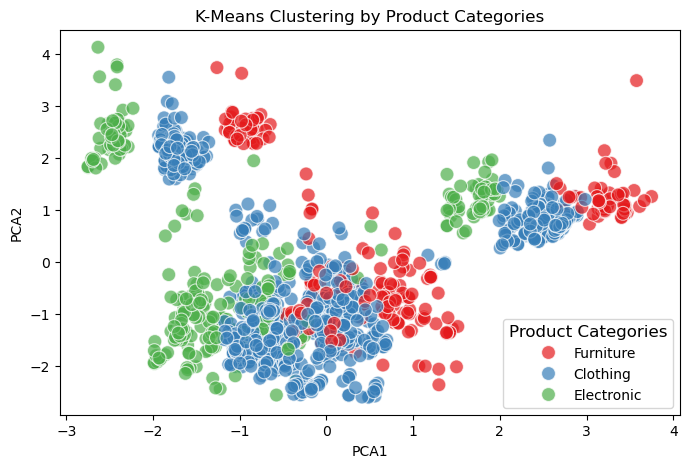

In [28]:
# Identifying product categories within clusters 

# Assuming Orders_c is already loaded as a DataFrame
data = Orders_c.copy()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
np.random.seed(50)

# Perform PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=50)  # Set random_state for reproducibility
data['Cluster'] = kmeans.fit_predict(data_pca)

# Add PCA results to the DataFrame for visualization
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]


# Plot the PCA results and clusters color-coded by Category
plt.figure(figsize=(8, 5))
scatter = sns.scatterplot(x='PCA1', y='PCA2', hue='Category', data=data, palette='Set1', s=100, alpha=0.7)

# Customizing the legend
legend_labels = ['Furniture', 'Clothing', 'Electronic']  # Customize these labels as needed
handles, _ = scatter.get_legend_handles_labels()
scatter.legend(handles, legend_labels, title='Product Categories', loc='best', fontsize='medium', title_fontsize='large')

plt.title('K-Means Clustering by Product Categories')
plt.show()


C:\Users\xhhhh\anaconda35\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


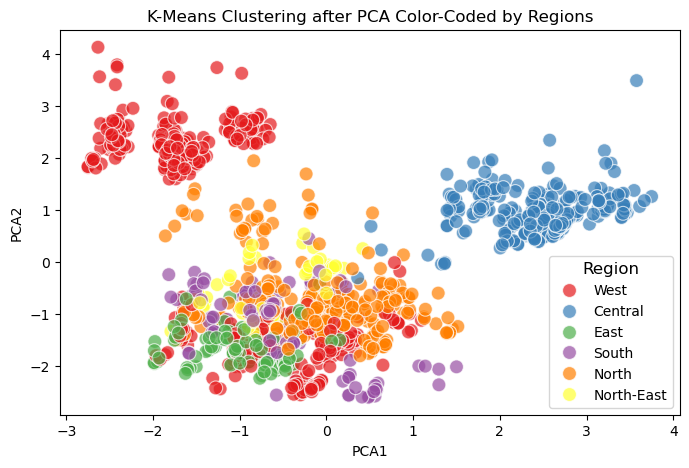

In [29]:
#Identifying regions within clusters 

data = Orders_c.copy()

# Define the state to region mapping
state_region_mapping = {
    "State_Jammu and Kashmir": "North",
    "State_Punjab": "North",
    "State_Haryana": "North",
    "State_Himachal Pradesh": "North",
    "State_Delhi": "North",
    "State_Uttar Pradesh": "North",
    "State_Uttarakhand": "North",
    "State_Andhra Pradesh": "South",
    "State_Karnataka": "South",
    "State_Kerala": "South",
    "State_Tamil Nadu": "South",
    "State_Bihar": "East",
    "State_Odisha": "East",
    "State_West Bengal": "East",
    "State_Goa": "West",
    "State_Gujarat": "West",
    "State_Maharashtra": "West",
    "State_Rajasthan": "West",
    "State_Madhya Pradesh": "Central",
    "State_Chhattisgarh": "Central",
    "State_Nagaland": "North-East",
    "State_Sikkim": "North-East"
}

# Function to apply the mapping
def map_region(row):
    for state in state_region_mapping:
        if state in row and row[state] == 1:
            return state_region_mapping[state]
    return None

# Apply the function to create the new column
data['Region'] = data.apply(map_region, axis=1)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['Region']))

np.random.seed(50)

# Perform PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=50)  # Set random_state for reproducibility
data['Cluster'] = kmeans.fit_predict(data_pca)

# Add PCA results to the DataFrame for visualization
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

# Plot the PCA results and clusters color-coded by Region
plt.figure(figsize=(8, 5))
scatter = sns.scatterplot(x='PCA1', y='PCA2', hue='Region', data=data, palette='Set1', s=100, alpha=0.7)
scatter.legend(title='Region', loc='best', fontsize='medium', title_fontsize='large')

plt.title('K-Means Clustering after PCA Color-Coded by Regions')
plt.show()



## Time Series Analysis

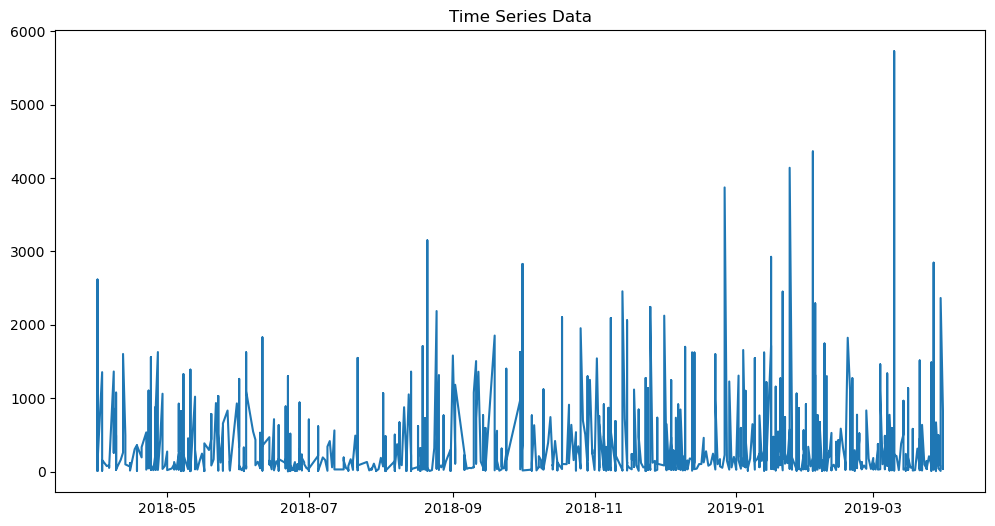

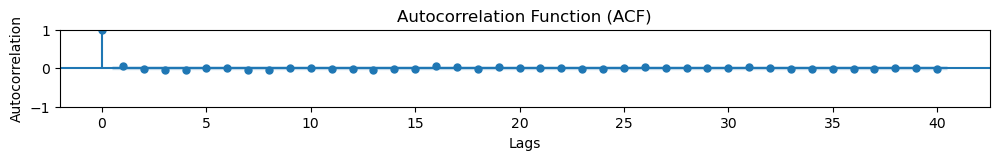

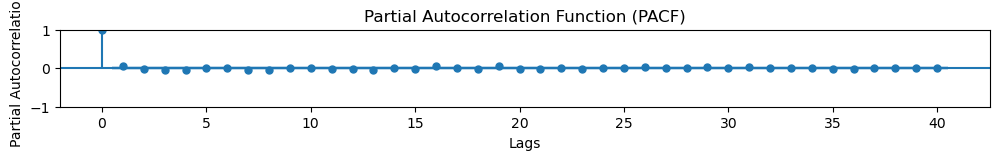

In [30]:
order = orders.copy()
order['Order Date'] = pd.to_datetime(orders['Order Date'])

order.set_index('Order Date', inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(order['Amount'], label='Original')
plt.title('Time Series Data')
plt.show()
# ACF Plot
plt.figure(figsize=(12, 1))
plot_acf(orders['Amount'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# PACF Plot
plt.figure(figsize=(12, 1))
plot_pacf(orders['Amount'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

C:\Users\xhhhh\AppData\Local\Temp\ipykernel_80684\1183144463.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df = pd.concat([arima_data, future_dates_df])


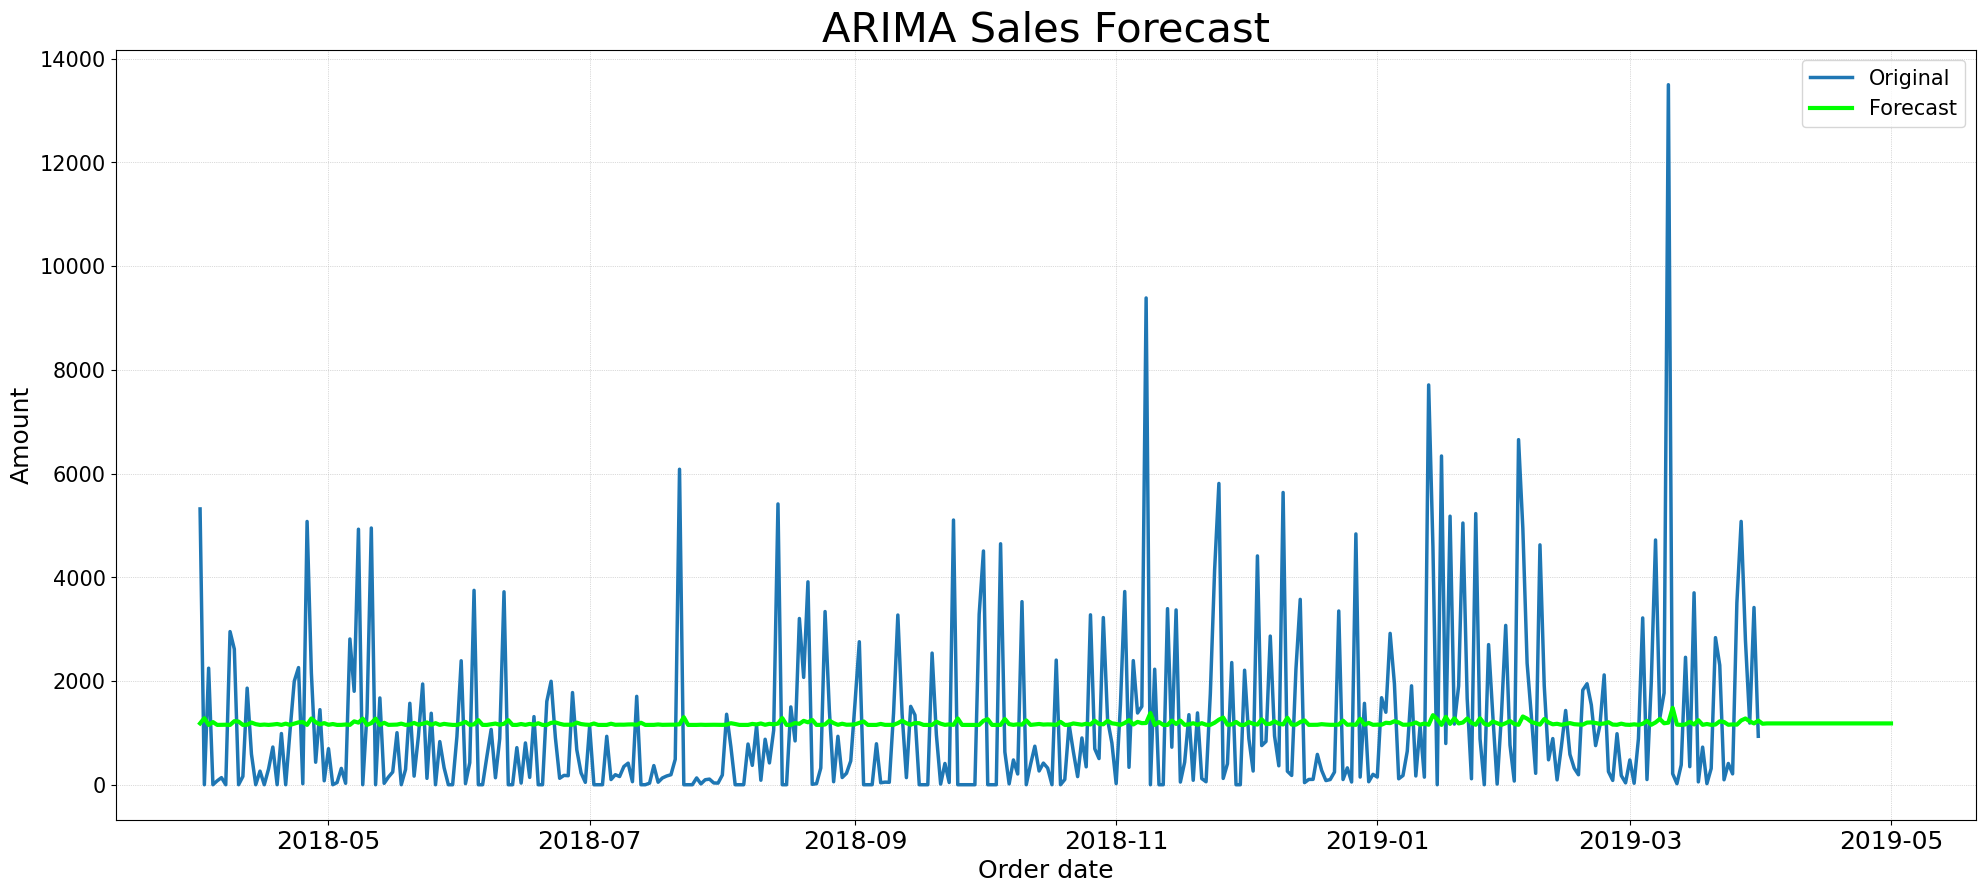

In [31]:
arima_data = orders.groupby('Order Date')['Amount'].sum().reset_index()
arima_data.set_index('Order Date', inplace=True)
arima_data = arima_data.resample('D').sum().fillna(0)  # Fill missing dates with 0


model = ARIMA(arima_data['Amount'], order=(1, 0, 0))
model_fit = model.fit()

future_dates = [arima_data.index[-1] + DateOffset(days=x) for x in range(0, 32)]
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=arima_data.columns)
future_df = pd.concat([arima_data, future_dates_df])


predict_values = model_fit.predict(start=0, end=len(arima_data) - 1)
forecast_values = model_fit.forecast(steps=31)

all_forecast = pd.concat([predict_values, pd.Series(forecast_values, index=future_dates[1:])])

future_df['SalesForecast'] = all_forecast

plt.figure(figsize=(24, 10))
plt.plot(future_df['Amount'], label='Original', linewidth=2.5)
plt.plot(future_df['SalesForecast'], label='Forecast', color='lime', linewidth=3)
plt.title('ARIMA Sales Forecast', fontsize=30)
plt.xlabel('Order date',fontsize = 18)
plt.ylabel('Amount',fontsize =18)
plt.grid(True, which='both', linestyle=':', linewidth=0.5, alpha=0.9) 
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.show()


In [32]:

arima_data.to_csv('futre.csv', index=False)


## Conducting CMA and TMA

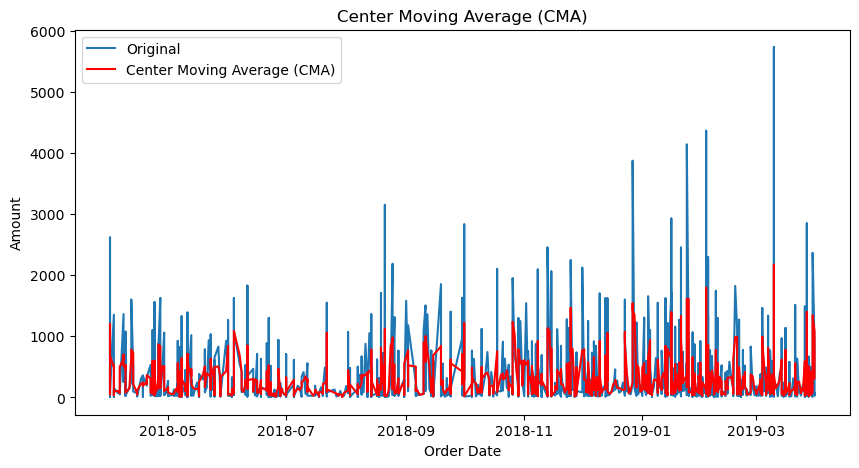

In [33]:
orders['CMA'] = orders['Amount'].rolling(window=3, center=True).mean()

plt.figure(figsize=(10, 5))
plt.plot(orders['Order Date'], orders['Amount'], label='Original')
plt.plot(orders['Order Date'], orders['CMA'], label='Center Moving Average (CMA)', color='red')
plt.xlabel('Order Date')
plt.ylabel('Amount')
plt.title('Center Moving Average (CMA)')
plt.legend()
plt.show()

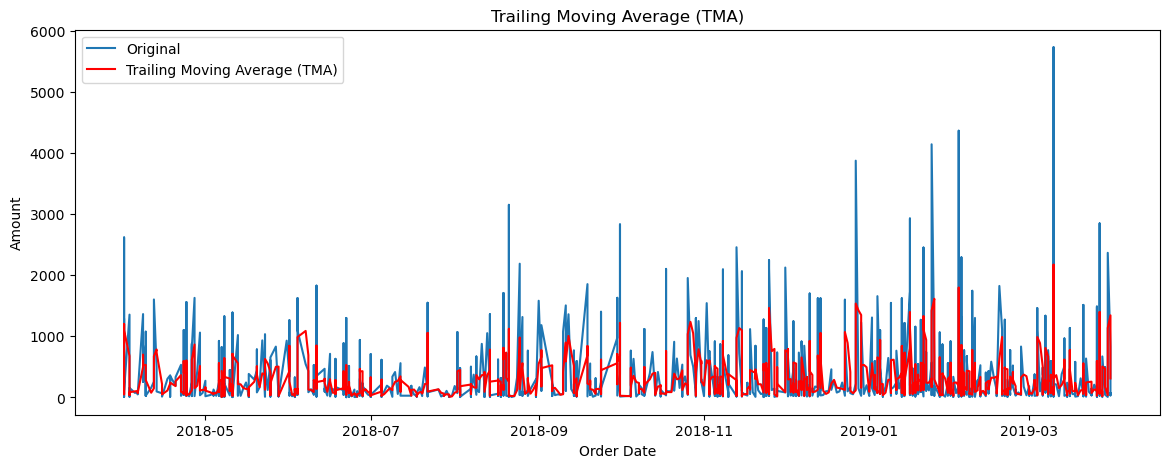

In [34]:
orders['TMA'] = orders['Amount'].rolling(window=3).mean()

plt.figure(figsize=(14, 5))
plt.plot(orders['Order Date'], orders['Amount'], label='Original')
plt.plot(orders['Order Date'], orders['TMA'], label='Trailing Moving Average (TMA)', color='red')
plt.xlabel('Order Date')
plt.ylabel('Amount')
plt.title('Trailing Moving Average (TMA)')
plt.legend()
plt.show()

## Deciding on the ARIMA Parameter

In [35]:
# !pip install pmdarima


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6683.188, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6587.699, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6681.199, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6518.948, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6499.961, Time=0.16 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=6478.960, Time=0.17 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=6473.110, Time=0.19 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=6470.693, Time=0.27 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=6472.405, Time=0.30 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.89 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.34 sec
 ARIMA(6,1,0)(0,0,0)[0]             : AIC=6468.674, Time=0

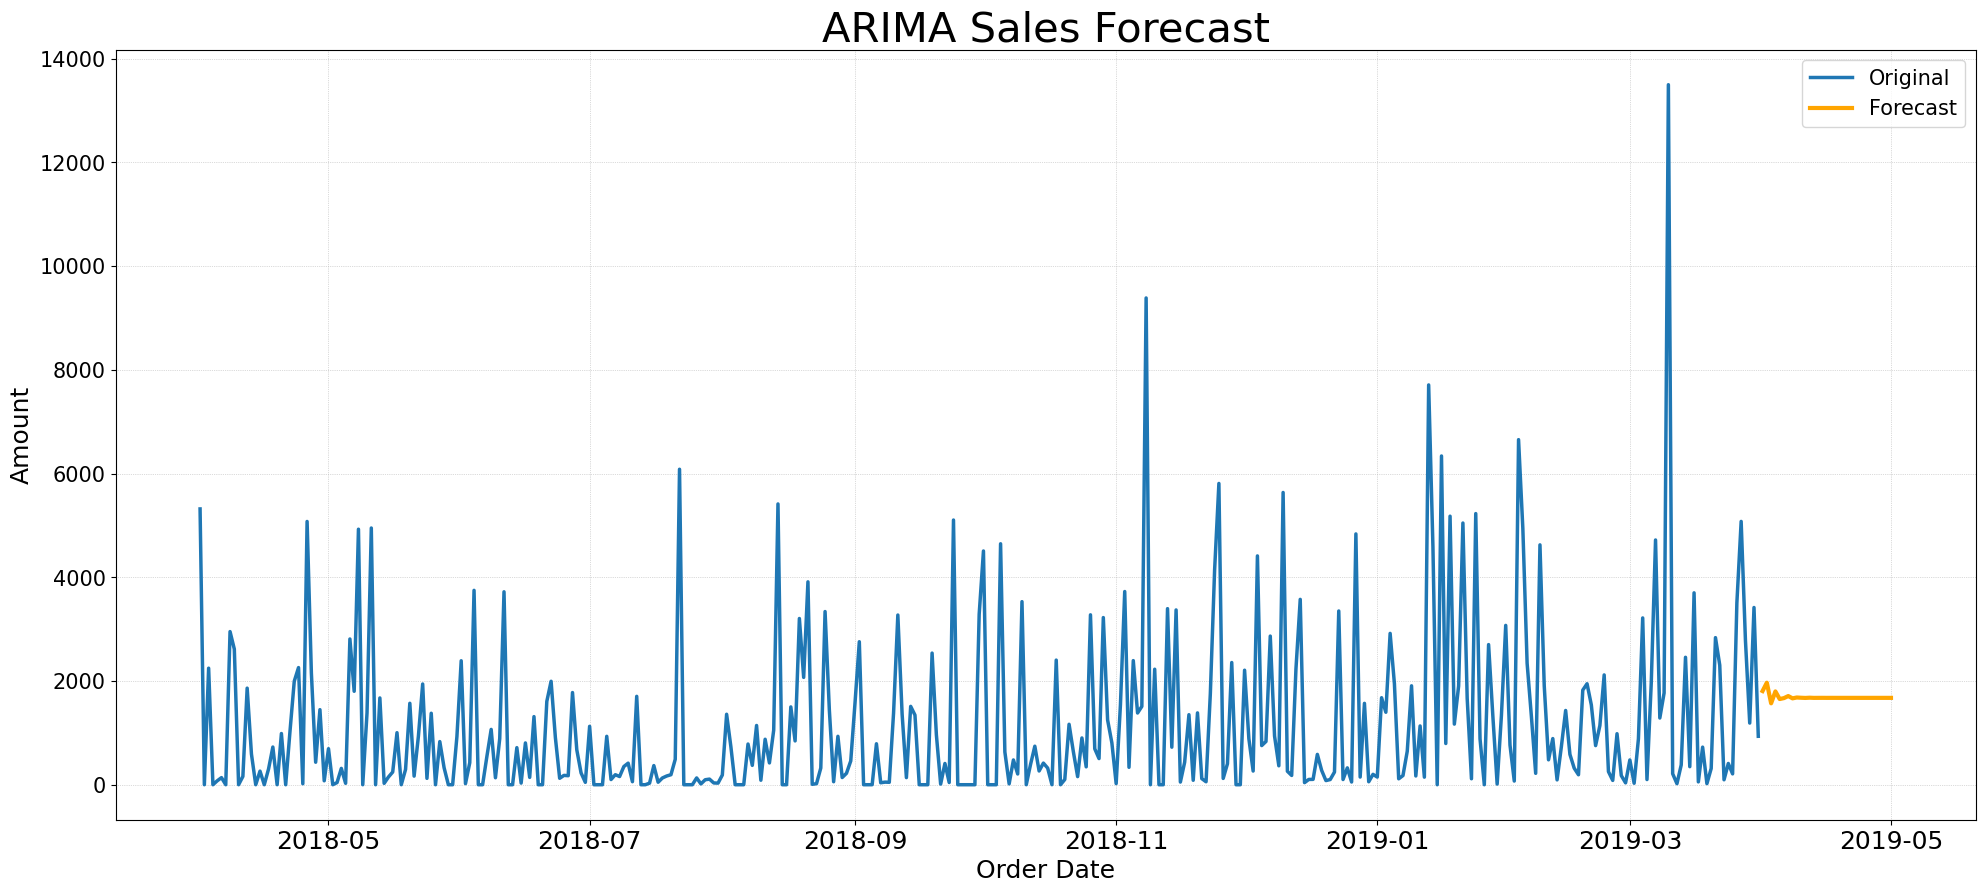

In [36]:
import pmdarima as pm
from pandas.tseries.offsets import DateOffset

arima_data = orders.groupby('Order Date')['Amount'].sum().reset_index()
arima_data.set_index('Order Date', inplace=True)
arima_data = arima_data.resample('D').sum().fillna(0)  # Fill missing dates with 0

# Use pmdarima's auto_arima to find the best parameters
model = pm.auto_arima(arima_data['Amount'], 
                      start_p=1, start_q=1,
                      max_p=10, max_q=1,
                      seasonal=False, trace=True,
                      error_action='ignore',  # don't want to know if an order does not work
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

# Fit the model
model_fit = model.fit(arima_data['Amount'])

# Forecast
n_periods = 31
future_dates = [arima_data.index[-1] + DateOffset(days=x) for x in range(0, n_periods+1)]
forecast = model_fit.predict(n_periods=n_periods)

# Combine the forecast with the dates
forecast_index = pd.date_range(start=arima_data.index[-1], periods=n_periods + 1, freq='D')[1:]
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot the forecast alongside the original data
plt.figure(figsize=(24, 10))
plt.plot(arima_data['Amount'], label='Original', linewidth=2.5)
plt.plot(forecast_series, label='Forecast', color='orange', linewidth=3)
plt.title('ARIMA Sales Forecast', fontsize=30)
plt.xlabel('Order Date', fontsize=18)
plt.ylabel('Amount', fontsize=18)
plt.grid(True, which='both', linestyle=':', linewidth=0.5, alpha=0.9) 
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.show()


C:\Users\xhhhh\AppData\Local\Temp\ipykernel_80684\2781849240.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df = pd.concat([arima_data, future_dates_df])


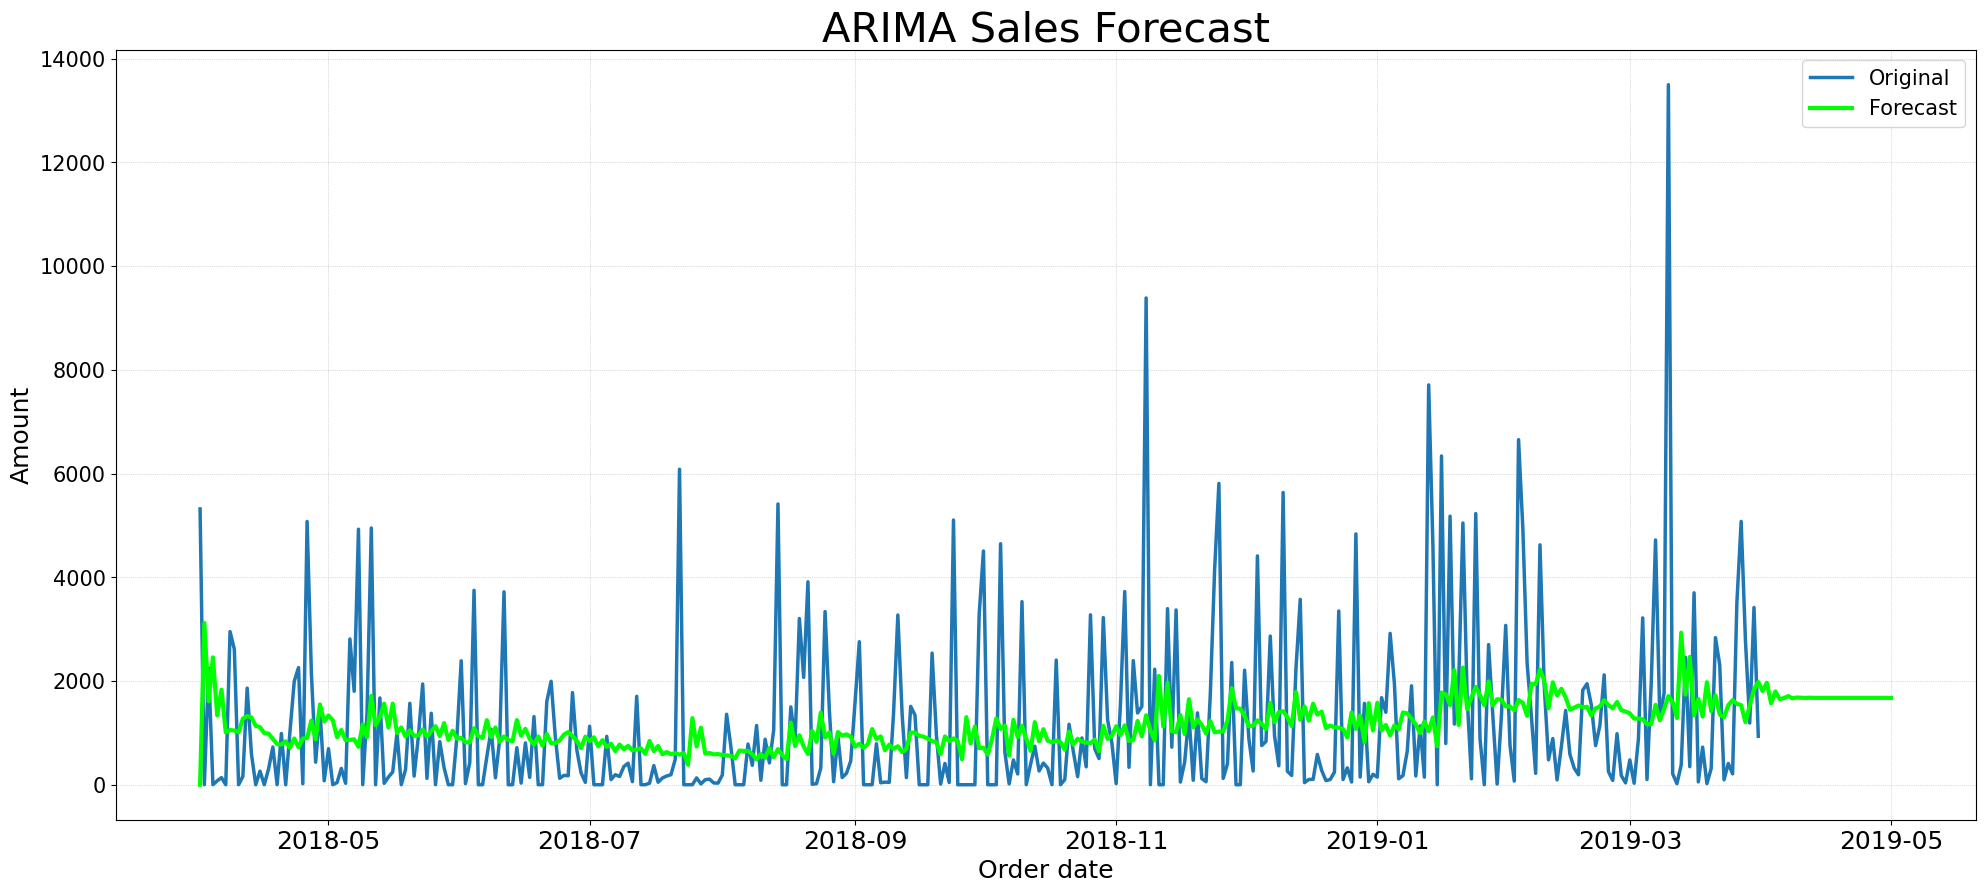

In [37]:
model = ARIMA(arima_data['Amount'], order=(5, 1, 1))
model_fit = model.fit()

future_dates = [arima_data.index[-1] + DateOffset(days=x) for x in range(0, 32)]
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=arima_data.columns)
future_df = pd.concat([arima_data, future_dates_df])


predict_values = model_fit.predict(start=0, end=len(arima_data) - 1)
forecast_values = model_fit.forecast(steps=31)

all_forecast = pd.concat([predict_values, pd.Series(forecast_values, index=future_dates[1:])])

future_df['SalesForecast'] = all_forecast

plt.figure(figsize=(24, 10))
plt.plot(future_df['Amount'], label='Original', linewidth=2.5)
plt.plot(future_df['SalesForecast'], label='Forecast', color='lime', linewidth=3)
plt.title('ARIMA Sales Forecast', fontsize=30)
plt.xlabel('Order date',fontsize = 18)
plt.ylabel('Amount',fontsize =18)

plt.grid(True, which='both', linestyle=':', linewidth=0.5, alpha=0.9) 
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.show()
